In [1]:
import sys 
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from linearRegression import *
from Matrix import *
from Vector import *


Test for calculating y-hat as sum of vector projections on column space of design matrix.
4x2 Matrix: 
Design matrix: [1.0, 1.0]
[1.0, 2.0]
[1.0, 3.0]
[1.0, 4.0]
4x2 Matrix: 
Orthogonalized design matrix: [0.5, -0.6708203932499369]
[0.5, -0.22360679774997896]
[0.5, 0.22360679774997896]
[0.5, 0.6708203932499369]
Data: [(1, 2), (2, 4), (3, 5), (4, 8)]
y-hat: [1.9, 3.8, 5.7, 7.6]
Test for calculating linear regression coefficients.
Data: [(1, 2), (2, 4), (3, 5), (4, 8)]
Beta: [-6.661338147750939e-15, 1.9000000000000008]
Second test for linear regression coefficients.
Data: [(1, 7), (2, 9), (3, 10), (4, 13)]
Beta: [4.999999999999988, 1.9000000000000012]
Test for calculating pearson correlation.
Data: [(1, 2), (2, 4), (3, 5), (4, 8)]
Pearson correlation: 0.9811557810392121


# Simple Linear Regression
### Patrick Doolittle 
### Machine Learning
### 5/21/2023

This notebook will demonstrate the role of the four fundamental subspaces, the moore-penrose psuedo inverse, embeddings, and projections in Linear Regression.
Let's enumerate the main ideas of this notebook:
1. The four fundamental subspaces
    - The column space, the set of all possible linear combinations of the columns of a matrix.
    - The Null space, the set of all vectors v such that $Xv=0$.
    - The row space, the set of all possible linear combinations of the rows of a matrix.
    - The left null space, the set of all vectors such that $X^Tv=0$.
2. The Moore-Penrose Pseudo Inverse $(X^T X)^-1 X^T$
    - Generalizes the idea of the inverse to Embeddings, Projection, and Singular Matrices
3. Embeddings and Projections
    - We call a function that maps a vector to a higher dimensional space an embedding.
    - We call a function that maps a vector to a lower dimensional space a projection.
    - Square matrices (linear operators) map from one space to itself.
4. Simple Linear Regression
    - $Xb=y$ where $X$ is the matrix with columns of predictor variables, $b$ is the vector of coefficients, and $y$ is the vector of responses.
    - The least squares solution is $b=(X^T X)^-1 X^T y$, the moore-penrose pseudo inverse of $X$ applied to $y$.
    - The Moore-Penrose Pseudo Inverse can be used to find the best fit hyperplane (line in 2d) for a set of data points.
     

My own custom Python code to calculate matrix and vector operations will be used along with various visualization libraries (matplotlib, manim) to demonstrate these ideas.

In [2]:
'''
In this code block we will generate a data set of 100 points in 2d, following a linear trend with some noise added.
'''
np.random.seed(1)
x = [np.random.choice(100) for i in range(100)]
x.sort()
print(x)
print(len(x))
y = [i * np.random.uniform(0.9,1.1) for i in x ]
print(y)
data = [(x[i],y[i]) for i in range(len(x))]
print(data)

[0, 1, 1, 3, 3, 3, 5, 6, 7, 7, 8, 8, 9, 9, 9, 10, 11, 12, 13, 13, 14, 15, 15, 16, 18, 20, 21, 22, 22, 23, 23, 23, 24, 25, 25, 25, 25, 26, 26, 27, 28, 29, 30, 32, 32, 34, 37, 37, 38, 41, 43, 46, 47, 49, 50, 50, 52, 55, 57, 57, 57, 60, 61, 62, 63, 64, 64, 65, 67, 68, 68, 68, 70, 71, 71, 71, 72, 72, 74, 75, 76, 76, 77, 79, 80, 81, 82, 83, 84, 86, 87, 87, 87, 87, 88, 88, 92, 94, 96, 98]
100
[0.0, 1.0530970208881743, 0.9090691457149307, 2.783979671515029, 3.1754421514776117, 2.717880814909436, 5.383125475819424, 6.048945827521159, 6.927172253988585, 7.548990220802635, 7.804134945841752, 8.061479510847976, 9.274137987714377, 8.750269836380918, 9.127815410133167, 10.275672968119354, 10.177892747098754, 12.456491010612348, 13.384148439410705, 12.620241630875585, 14.73705254760234, 14.569595170674166, 15.758365059526815, 17.22029385482884, 16.24200909725122, 19.992436278512947, 19.20992644788275, 23.26258648766393, 20.081896251288157, 22.33442766711557, 25.032449964265744, 22.44709511913601, 25

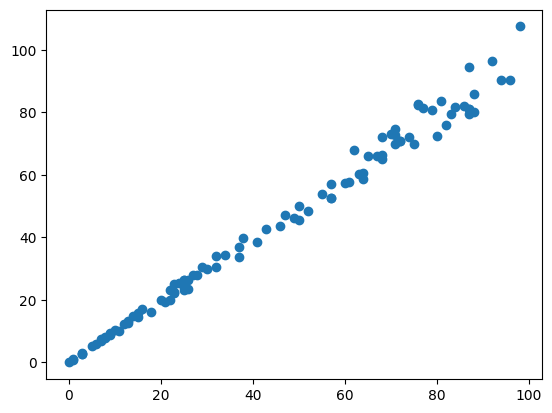

In [3]:
'''Show a scatter plot of the data'''
plt.scatter(x,y)

In [4]:
# Oops! I oversaw that the data would become more variable over time. Let's make the noise fixed with respect to the x-axis.
np.random.seed(42)
x = [np.random.choice(100) for i in range(100)]
x.sort()
print(x)
print(len(x))
y = [(2*i) + np.random.normal(-10,10) + 20 for i in x ]
print(y)
print(len(y))   
data = [(x[i],y[i]) for i in range(len(x))]
print(data)

[1, 1, 1, 1, 2, 2, 3, 3, 3, 5, 6, 7, 8, 13, 13, 14, 14, 14, 17, 17, 20, 20, 20, 21, 21, 23, 23, 29, 32, 33, 34, 35, 37, 38, 39, 41, 43, 43, 46, 46, 47, 48, 49, 50, 50, 51, 52, 52, 52, 53, 53, 54, 57, 58, 59, 59, 59, 59, 60, 61, 61, 61, 61, 61, 62, 63, 63, 70, 71, 71, 72, 73, 74, 74, 75, 77, 77, 79, 79, 80, 81, 82, 83, 84, 86, 86, 87, 87, 88, 88, 89, 89, 90, 91, 91, 92, 92, 94, 99, 99]
100
[-1.46678097361346, 3.1940873395289344, 0.6944769531843313, 13.34428882628022, 19.821227947130392, 22.877484595933574, 24.943323301087617, 23.54997797244736, 13.928341098954258, 13.7652260501504, 6.91846710452517, 34.9964697578482, 24.222678787293447, 31.896166913136994, 47.79716344700701, 29.017920605443216, 46.347954192304286, 40.96561384328971, 33.621701234845176, 43.241962549718146, 59.72963533755787, 57.95595463895942, 64.95434252883473, 55.3818125199332, 85.72296253626672, 46.79609194932624, 52.01361609984799, 67.39135912525254, 59.81249541408597, 86.42491617339421, 87.03532490625842, 80.1900033

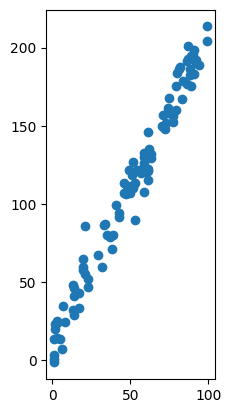

In [5]:
fig, ax = plt.subplots()

plt.scatter(x,y)

ax.set_aspect('equal')

In [6]:
b = linear_regression(data)
print('Intercept: ' + str(b[0]) + ' Slope: ' + str(b[1]))

Intercept: 10.388053638118514 Slope: 1.9929761262640784


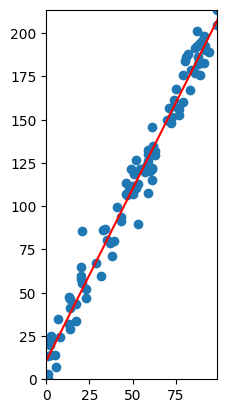

In [7]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_aspect('equal')
ax.set_xlim(0, np.max(x))
ax.set_ylim(0, np.max(y))
ax.axline((0, b[0]), slope=b[1], color='red')
plt.show()

In [8]:
#Let's also calculate the correlation coefficient
print('Pearson correlation coefficient: ' + str(pearson_correlation(Vector(x), Vector(y))))

Pearson correlation coefficient: 0.9876027211966314


# Analysis
Now we have shown that we can find the best-fit regression line using linear algebra methods in python. Let's explore in detail how the moore-penrose invers, projections and embeddings, and the four fundamental subspaces are used in this process.

### Linear Maps
Let's examine the key linear maps we must apply to our response variable to get $\beta$: $\beta = (X^T X)^-1 X^T y$.

The first is the inverse of the gram matrix $(X^T X)$: $(X^T X)^{-1}$. The gram matrix is a 2x2 matrix, we can examine the columns of this matrix to get a sense of this linear operation. This is a linear operator in $R^2$.

The second is $X^T$, which takes the dot products of the predictor columns in $X$ with $y$, which results in a vector in $R^2$. This makes it a projection from $R^m$ to $R^2$.

In [9]:
#Let's calculate the gram_matrix for the above design matrix
design_matrix, response_variable = design(data)
gram_matrix = design_matrix.transpose() @ design_matrix
print('Gram Matrix: \n' + str(gram_matrix))
inverse_gram_matrix = gram_matrix.inverse()
print('Gram Matrix Inverse: \n' + str((inverse_gram_matrix)))
projected_response = design_matrix.transpose() * response_variable
print('Projection of X^T on y: \n' + str((projected_response)))
print('Gram Inverse Applied to Projected Response: \n' + str((inverse_gram_matrix * projected_response)))

2x2 Matrix: 
Gram Matrix: 
[100.0, 5054.0]
[5054.0, 341152.0]
2x2 Matrix: 
Gram Matrix Inverse: 
[0.039797094916593986, -0.0005895744937988521]
[-0.0005895744937988521, 1.1665502449522204e-05]
Projection of X^T on y: 
[11111.3067059505, 732409.0145142936]
Gram Inverse Applied to Projected Response: 
[10.388053638118492, 1.9929761262640797]


### Initial Impressions
We can see that the first entry in the gram matrix $G_{11}$ is the dot product of the constant column with itself, which is equal to the number of data points $n$ since it's $1 \cdot 1$ added 100 times. The diagonal elements of the gram matrix are the dot products of the predictors with each other. The final element $G_{22}$ is the dot product of the independent variable with itself, and its quite large since it is highly sensitive to the scale of the independent variable.

&ensp; In terms of being a linear operator, the first basis vector in this operation is quite small, but the second basis vector appears to be stretched significantly because of the scale of the independent variable. The first basis vector contains information about both itself and it's relation to the other predictor, as does the second. The inverse of the gram matrix on the other hand has a serious shrinking effect. Both column vectors have a shrinking effect, but the second one much moreso the compensate for the scale of the independent variable.

&ensp; This shows how the moore-penrose inverse operates to get the coefficients of regression in the simple linear regression problem. First we project the response variable onto the row space of $X$ by taking $X^T y$. This vector is quite large because it is sensitive to the scale of the independent variable. Then we shrink this vector by multiplying it by the inverse of the gram matrix, this is an operator over the row space of $X$ that shrinks vectors down as if they went through the expansion X X^T. 

### First map $X^T y$ and $X^T X$
The first thing we do is project both $Xb$ and $y$ down to $R^2$ by applying the projection $X^T$ to them. In this case our projection is

$$ X^T Xb = \begin{bmatrix} 1 & 1 & \dots & 1 \\ a_0 & a_1 & \ldots & a_n \end{bmatrix} \begin{bmatrix} \alpha_1 \\ \alpha_2 \\ \ldots \\ \alpha_n \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}  $$

$$ X^T y = \begin{bmatrix} 1 & 1 & \dots & 1 \\ a_0 & a_1 & \ldots & a_n \end{bmatrix} \begin{bmatrix} y_1 \\ y_2 \\ \ldots \\ y_n \end{bmatrix} = \begin{bmatrix} c_1 \\ c_2 \end{bmatrix}   $$

Notice that the Matrix-vector product $Xb$ has already been abstracted to the vector $\alpha = \begin{bmatrix} \alpha_1 \\ \alpha_2 \\ \ldots \\ \alpha_n \end{bmatrix}$. This is a vector in the column space of $X$ while $y$ is not necesarrily. Thus these two linear maps put $y$ and $Xb$ down to the *row* space of $X$, which spans $R^2$ since the rank far exceeds the row dimension.

#### Map Examination

$$ X^T = \begin{bmatrix} 1 & 1 & \dots & 1 \\ a_0 & a_1 & \ldots & a_n \end{bmatrix} $$
This is an projection from $R^m$ to $R^2$ where $m$ is the number of data points. This is a projection onto the row space of $X$. Entries in the real space are multiplied by the correspdonding predictors and then the predictor products are added up. This makes the $b$ and $v$ vectors the weighted sums of the predictors with the weight being the value of the response variable. 

In general, a projection is a matrix with more columns than rows. The original vector becomes a linear combination of the column vectors in the Matrix map, so the response variable becomes a linear combination of the predictors. It becomes a new vector in the row space of X where the basis vectors are the predictors themselves. It used to be a vector in the column space of X where the basis vectors where the data points themselves.

$$X^T y = \begin{bmatrix} \text{weighted constant predictors summed} \\ \text{weighted variable predictors summed} \end{bmatrix} $$

### Column Space versus Row Space

The column space of this design matrix is the set of vectors that can be reached via combinations of the columns (by left multiplication on a vector)
The row space is found by right multiplication or left multiplication of the transpose and is all linear combinations of the rows. 
Left multiplication by $X$ results in a vector in the column space, left multiplication by $X^T$ results in a vector in the row space.

$$ X \{ \mathbb{R^n} \to \mathbb{R^m} \} $$

### Linear Map "Projection" versus Orthogonal Projection onto a Subspace  

### Second map $(X^T X)^{-1}$

The second map is the inverse of the gram matrix, which is a 2x2 matrix. We can examine the columns of this matrix to get a sense of this linear operation. This is a linear operator in $R^2$.

$$ (X^T X) = \begin{bmatrix} 1 & 1 & \dots & 1 \\ a_0 & a_1 & \ldots & a_n \end{bmatrix} \begin{bmatrix} 1 & a_0 \\ 1 & a_1 \\ \ldots & \ldots \\ 1 & a_n \end{bmatrix} = \begin{bmatrix} n & \sum a_i \\ \sum a_i & \sum a_i^2 \end{bmatrix} $$




## Comparing linear projection to subspace projection
Although I learned of the vector projection as $\frac{u \cdot v}{|v|^2}v$, There is a more concise way of representing it given that $|v|^2 = v \cdot v = v^T v$.

Vector Projection: $Proj(u \to v) = u^T \hat{v}$
$$Proj(u \to v) = \frac{u \cdot v}{|v|^2}v = \frac{u^T  v}{v^T v}v = \frac{v^T  u}{v^T v}v = v\frac{v^T  u}{v^T v} = \frac{v v^T}{v^T v}u $$

This means we can generalize the projection onto the subspace spanned by the vector $v$ as $P(v) = \frac{v v^T}{v^T v}$.
This allows us to make an important conclusion. The Projection matrix onto the subspace spanned by $v$ is the outer product of $v$ divided by the inner product of $v$! 

In [10]:
u = Vector([8,17,3])
v = Vector([2,5,7])
print("u dot v: " + str(dot(u,v)))
print("u^T * v: " + str(vector_transpose(u) * v))
print("v^T * u: " + str(vector_transpose(v) * u))
print("v^T v: " + str(vector_transpose(v) * v))

u dot v: 122.0
u^T * v: [122.0]
v^T * u: [122.0]
v^T v: [78.0]


Let's try to verify that $(v^T u)v = v(v^T u) = (v v^T)u$

In [13]:
print("(v^T u)v: " + str(v * (vector_transpose(v) * u)[0]))
print("(v v^T)u: " + str((vector_matrix(v) @  vector_transpose(v)) * u))


(v^T u)v: [244.0, 610.0, 854.0]
(v v^T)u: None
